In [28]:
!pip install plotly

In [37]:
!pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [31]:
!pip install calplot

In [42]:
!pip install july
import july
from july.utils import date_range

In [33]:
#read the data
import pandas as pd
df = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')
df.shape

(2823, 25)

In [34]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [35]:
#change the type of data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
#Set orderdate as index
df.set_index('ORDERDATE', inplace = True)

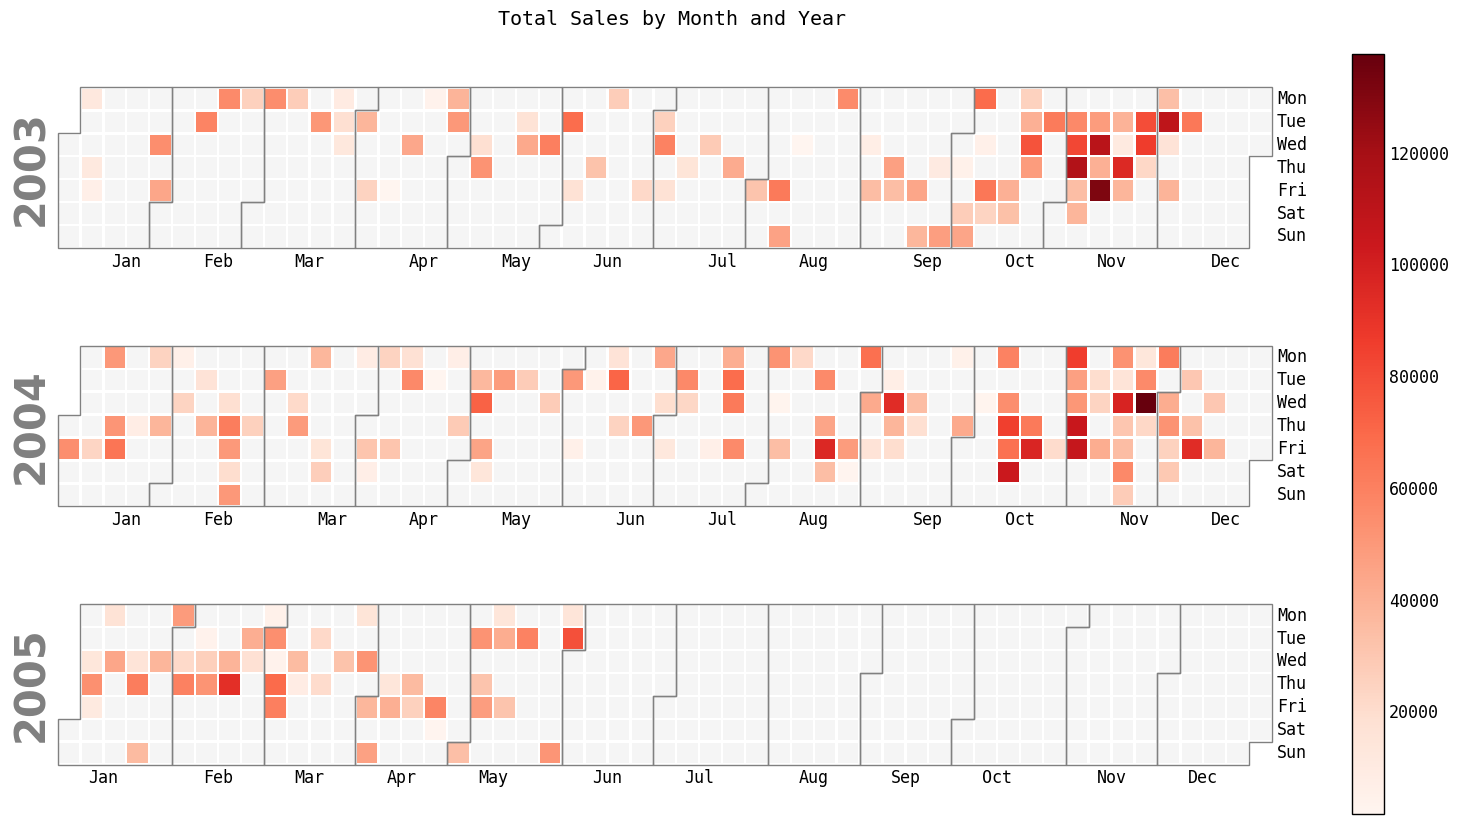

In [36]:
import calplot
pl1 = calplot.calplot(data = df['SALES'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "Total Sales by Month and Year")

In [38]:
products = set(list(df['PRODUCTLINE']))

In [39]:
def draw_calplot(prod):
   data_subset = df[df['PRODUCTLINE'] == prod]
   plt = calplot.calplot(data = data_subset['SALES'], how = 'sum', figsize = (16,8), suptitle = 'Total Sales for teh Product '+prod) 

In [40]:
x = interact(draw_calplot, prod = products) 

interactive(children=(Dropdown(description='prod', options=('Ships', 'Planes', 'Motorcycles', 'Trucks and Buse…

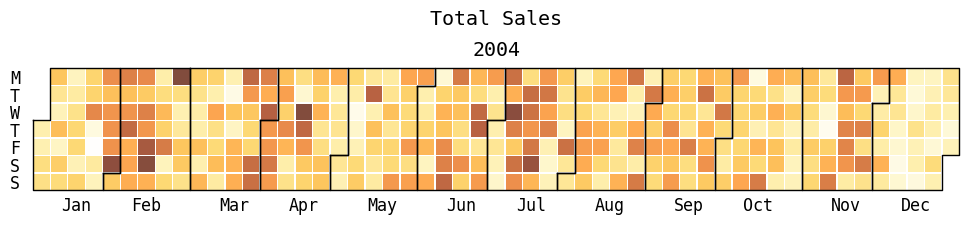

In [43]:
dates = date_range("2004-01-01", "2004-12-31")
july.heatmap( dates, data =df['SALES'], title='Total Sales', cmap="golden", month_grid=True, horizontal = True)

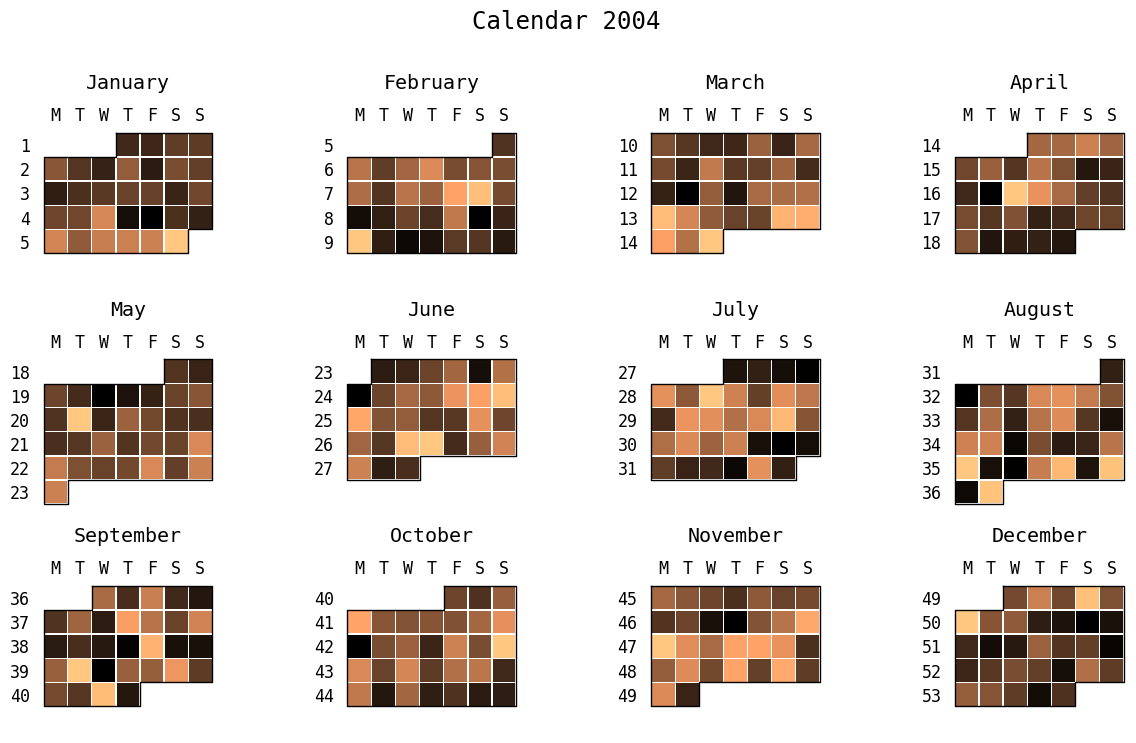

In [44]:
july.calendar_plot(dates, df['SALES'], cmap = 'copper');